In [1]:
import sklearn
import tensorflow as tf
from tensorflow import keras 
import warnings
warnings.filterwarnings('ignore')

2025-10-14 10:25:30.595543: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-10-14 10:25:30.598266: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-10-14 10:25:30.639623: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-10-14 10:25:31.804175: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
from sklearn import datasets
import numpy as np
import pandas as pd

# Load the wine dataset
wine = datasets.load_wine()

# Convert to pandas DataFrame
df = pd.DataFrame(data=np.c_[wine['data'], wine['target']], columns=wine['feature_names'] + ['target'])
df.shape

(178, 14)

#### Data Summary

In [3]:
print(f"Size: {df.shape[1]} samples with  {df.shape[1]} columns/features")
print(f"Features: {df.columns.tolist()[::-1]}")
targets = df.target.unique().astype(int).tolist()
print(f"Classification Targets: { targets}");
print(f"Target Names: {wine.target_names}");


Size: 14 samples with  14 columns/features
Features: ['target', 'proline', 'od280/od315_of_diluted_wines', 'hue', 'color_intensity', 'proanthocyanins', 'nonflavanoid_phenols', 'flavanoids', 'total_phenols', 'magnesium', 'alcalinity_of_ash', 'ash', 'malic_acid', 'alcohol']
Classification Targets: [0, 1, 2]
Target Names: ['class_0' 'class_1' 'class_2']


#### Data Preview

In [4]:
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0.0


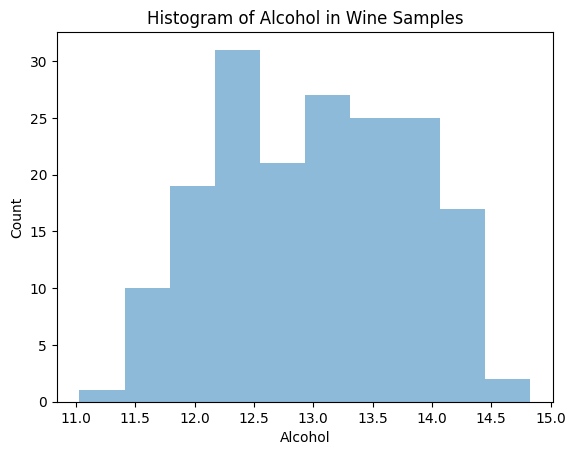

In [5]:
# Plot a histogram of the 'alcohol' feature
import matplotlib.pyplot as plt
plt.hist(df['alcohol'], bins=10, alpha=0.5)
plt.xlabel('Alcohol')
plt.ylabel('Count')
plt.title('Histogram of Alcohol in Wine Samples')
plt.show()

In [6]:
# Split the data into training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(wine.data, wine.target, test_size=0.2, random_state=42)

Decision Tree Accuracy: 0.94


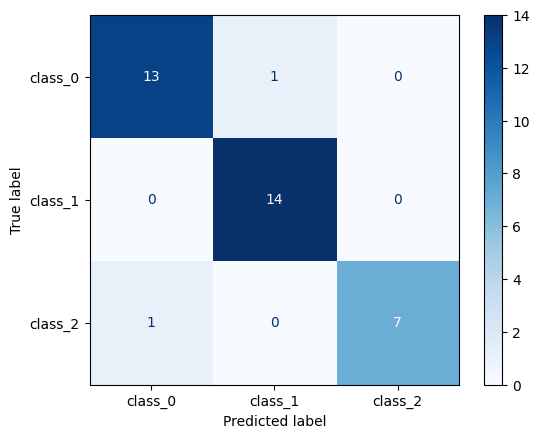

In [7]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay


# Create and train a decision tree
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)

# Make predictions on the test set and calculate the accuracy
y_pred_tree = tree.predict(X_test)
accuracy_tree = accuracy_score(y_test, y_pred_tree)
print(f"Decision Tree Accuracy: {accuracy_tree:.2f}", )

# utility function to draw confusion matrix with maplotlon
def show_confusion_matrix(y_test, y_pred):
    cfm = confusion_matrix(y_test, y_pred)
    cm_display = ConfusionMatrixDisplay(cfm, display_labels=wine.target_names)
    cm_display.plot(cmap="Blues")


# Show confusion matrix for the decision tree
show_confusion_matrix(y_test, y_pred_tree)
    

Random Forest Accuracy: 1.00


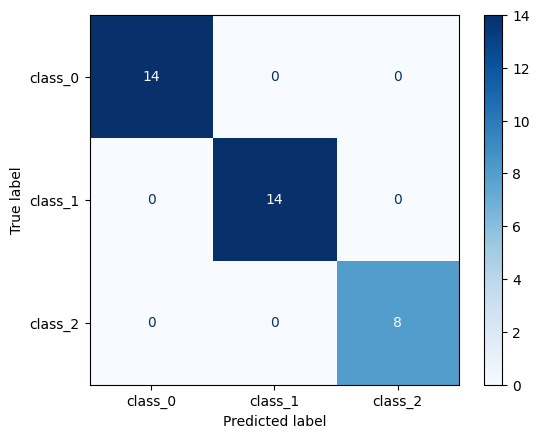

In [8]:
    # Now let's create and train a random forest classifier
    from sklearn.ensemble import RandomForestClassifier
    forest = RandomForestClassifier(n_estimators=100, random_state=42)
    forest.fit(X_train, y_train)

    # Make predictions on the test set and calculate the accuracy
    y_pred_forest = forest.predict(X_test)

    accuracy_forest = accuracy_score(y_test, y_pred_forest)
    print(f"Random Forest Accuracy: {accuracy_forest:.2f}", )

    show_confusion_matrix(y_test, y_pred_forest )

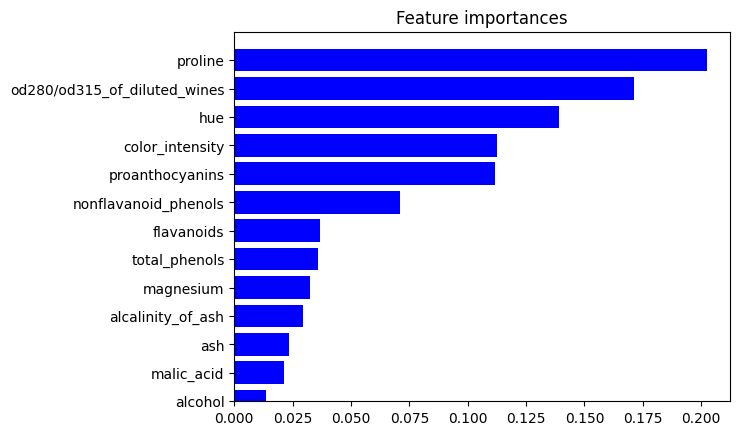

In [9]:
importance=forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importance)
# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.barh(range(wine.data.shape[1]), importance[indices],
       color="b",  align="center")

plt.yticks(range(wine.data.shape[1]), df.columns[:-1].tolist())
plt.ylim([0, wine.data.shape[1]])
plt.show()


In [10]:
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

# Standardize the features to have mean=0 and variance=1
scaler = StandardScaler()
data = scaler.fit_transform(wine.data)

# Convert targets to categorical (one-hot encoding)
targets = to_categorical(wine.target)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(data, targets, test_size=0.2, random_state=42)

# Create a Sequential model
model = Sequential()
model.add(Dense(13, activation='relu', input_shape=(13,)))
model.add(Dense(3, activation='softmax'))

# Compile the model with 'categorical_crossentropy' loss function and 'adam' optimizer
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model for 20 epochs
model.fit(X_train, y_train, epochs=20, batch_size=1, verbose=1)

# Make predictions on the test set and calculate the accuracy
y_pred_mlp = np.argmax(model.predict(X_test), axis=-1)
accuracy_mlp = accuracy_score(np.argmax(y_test, axis=-1), y_pred_mlp)
print("MLP Accuracy:", accuracy_mlp)

# Print the confusion matrix for the MLP
print("MLP Confusion Matrix:")
cfn=confusion_matrix(np.argmax(y_test, axis=-1), y_pred_mlp)
print()

Epoch 1/20
142/142 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.5352 - loss: 0.9465    
Epoch 2/20
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 867us/step - accuracy: 0.7676 - loss: 0.6491
Epoch 3/20
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 891us/step - accuracy: 0.9014 - loss: 0.4766
Epoch 4/20
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 853us/step - accuracy: 0.9296 - loss: 0.3571
Epoch 5/20
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 883us/step - accuracy: 0.9507 - loss: 0.2690
Epoch 6/20
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 838us/step - accuracy: 0.9577 - loss: 0.2058
Epoch 7/20
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 851us/step - accuracy: 0.9648 - loss: 0.1609
Epoch 8/20
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 837us/step - accuracy: 0.9789 - loss: 0.1291
Epoch 9/20
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 841us/step - accuracy: 0.9930 - loss: 0.1056
Epoch 10/20
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 829us/step - accuracy: 0.9930 - loss: 0.0887
Epoch 11/20
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 880us/step - accuracy: 0.9930 - loss: 0.0747
Epoch 12/20
142/142 ━━━━━━━━

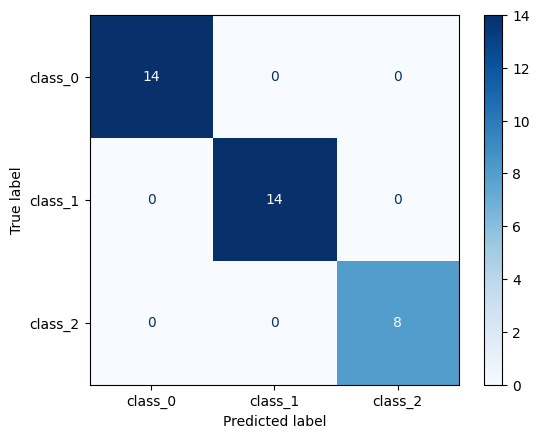

In [12]:
show_confusion_matrix(np.argmax(y_test, axis=-1),  y_pred_mlp )